In [24]:
import numpy as np
from hmmlearn import hmm



In [25]:
# 加载saliency map数据
saliency_map = np.load("/Users/luopeiyuan/Desktop/FYP/FYP_Codes/deep-learning-for-image-processing/pytorch_classification/grad_cam/ResNet_IMAGE_Folder/DogSaliencyData/10000.npy")


In [28]:
print(saliency_map.shape)

(412, 263, 3)


In [31]:
# 获取saliency map数据的尺寸
height, width, _ = saliency_map.shape

# 将saliency map数据转换为二维数组
saliency_values = saliency_map[:,:,0].reshape(-1)  # 使用第一个通道的值作为显著性值

# 找到显著性值最高的三个区域的索引
top_indices = np.argsort(saliency_values)[-3:]

# 将一维索引转换为二维坐标
top_coordinates = np.unravel_index(top_indices, (height, width))

# 打印结果
print("显著性值最高的三个区域的坐标：", top_coordinates)

# 将选定的区域分配一个状态
states = ['A', 'B', 'C']

# 定义HMM模型
model = hmm.CategoricalHMM(n_components=3)

# 定义状态转移概率矩阵
transmat = np.array([[0.5, 0.3, 0.2],
                     [0.3, 0.4, 0.3],
                     [0.2, 0.3, 0.5]])
model.transmat_ = transmat

# 定义初始概率向量
startprob = np.array([0.3, 0.4, 0.3])
model.startprob_ = startprob

# 定义观测概率矩阵
observations = saliency_values[top_indices]
observations = observations.reshape(1, -1)
model.emissionprob_ = observations

# 打印HMM模型的参数
print("状态转移概率矩阵:\n", model.transmat_)
print("初始概率向量:\n", model.startprob_)
print("观测概率矩阵:\n", model.emissionprob_)

显著性值最高的三个区域的坐标： (array([141, 141, 141]), array([139, 137, 138]))
状态转移概率矩阵:
 [[0.5 0.3 0.2]
 [0.3 0.4 0.3]
 [0.2 0.3 0.5]]
初始概率向量:
 [0.3 0.4 0.3]
观测概率矩阵:
 [[249 249 251]]


In [35]:
import pandas as pd
from numpy import array


# 显著性值最高的三个区域的坐标
top_coordinates = (array([141, 141, 141]), array([139, 137, 138]))

# 状态转移概率矩阵
transition_matrix = [[0.5, 0.3, 0.2], [0.3, 0.4, 0.3], [0.2, 0.3, 0.5]]

# 初始概率向量
prior_vector = [0.3, 0.4, 0.3]

# 创建表格
df = pd.DataFrame({'Top Coordinates': top_coordinates[0], 'Left Coordinates': top_coordinates[1]})
df['States'] = ['A', 'B', 'C']
df['Prior Probability'] = prior_vector
for i, state in enumerate(['A', 'B', 'C']):
    df[state] = transition_matrix[i]

# 打印表格
print(df)

   Top Coordinates  Left Coordinates States  Prior Probability    A    B    C
0              141               139      A                0.3  0.5  0.3  0.2
1              141               137      B                0.4  0.3  0.4  0.3
2              141               138      C                0.3  0.2  0.3  0.5


In [39]:
import numpy as np
from hmmlearn import hmm

# Load saliency map data
saliency_map = np.load("/Users/luopeiyuan/Desktop/FYP/FYP_Codes/deep-learning-for-image-processing/pytorch_classification/grad_cam/ResNet_IMAGE_Folder/DogSaliencyData/10000.npy")

# Reshape saliency map data to 2D array
saliency_map_2d = saliency_map.reshape(-1, 3)

# Calculate saliency scores for each pixel
saliency_scores = np.sum(saliency_map_2d, axis=1)

# Find indices of top 300 saliency scores
top_indices = np.argsort(saliency_scores)[-300:]

# Randomly select three regions of 100 pixels each
np.random.shuffle(top_indices)
region1 = top_indices[:100]
region2 = top_indices[100:200]
region3 = top_indices[200:300]

# Create prior probabilities for the three regions
prior = np.zeros(3)
prior[0] = len(region1) / len(top_indices)
prior[1] = len(region2) / len(top_indices)
prior[2] = len(region3) / len(top_indices)

# Create transition matrix for the three regions
transition_matrix = np.zeros((3, 3))
transition_matrix[0, 1] = len(np.intersect1d(region1, region2)) / len(region1)
transition_matrix[0, 2] = len(np.intersect1d(region1, region3)) / len(region1)
transition_matrix[1, 0] = len(np.intersect1d(region2, region1)) / len(region2)
transition_matrix[1, 2] = len(np.intersect1d(region2, region3)) / len(region2)
transition_matrix[2, 0] = len(np.intersect1d(region3, region1)) / len(region3)
transition_matrix[2, 1] = len(np.intersect1d(region3, region2)) / len(region3)

# Create HMM model
model = hmm.CategoricalHMM(n_components=3)
model.startprob_ = prior
model.transmat_ = transition_matrix

# Print prior probabilities and transition matrix
print("Prior probabilities:")
print(prior)
print("Transition matrix:")
print(transition_matrix)

Prior probabilities:
[0.33333333 0.33333333 0.33333333]
Transition matrix:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [41]:
import numpy as np
from hmmlearn import hmm

# Load saliency map data
saliency_map = np.load("/Users/luopeiyuan/Desktop/FYP/FYP_Codes/deep-learning-for-image-processing/pytorch_classification/grad_cam/ResNet_IMAGE_Folder/DogSaliencyData/10000.npy")

# Reshape saliency map data to 2D array
saliency_map_2d = saliency_map.reshape(-1, 3)

# Calculate saliency scores for each pixel
saliency_scores = np.sum(saliency_map_2d, axis=1)

# Find indices of top 300 saliency scores
top_indices = np.argsort(saliency_scores)[-300:]

# Randomly select three regions of 100 pixels each
np.random.shuffle(top_indices)
region1 = top_indices[:100]
region2 = top_indices[100:200]
region3 = top_indices[200:300]

# Create prior probabilities for the three regions
prior = np.zeros(3)
prior[0] = len(region1) / len(top_indices)
prior[1] = len(region2) / len(top_indices)
prior[2] = len(region3) / len(top_indices)

# Create transition matrix for the three regions
transition_matrix = np.zeros((3, 3))
if len(np.intersect1d(region1, region2)) > 0:
    transition_matrix[0, 1] = len(np.intersect1d(region1, region2)) / len(region1)
if len(np.intersect1d(region1, region3)) > 0:
    transition_matrix[0, 2] = len(np.intersect1d(region1, region3)) / len(region1)
if len(np.intersect1d(region2, region1)) > 0:
    transition_matrix[1, 0] = len(np.intersect1d(region2, region1)) / len(region2)
if len(np.intersect1d(region2, region3)) > 0:
    transition_matrix[1, 2] = len(np.intersect1d(region2, region3)) / len(region2)
if len(np.intersect1d(region3, region1)) > 0:
    transition_matrix[2, 0] = len(np.intersect1d(region3, region1)) / len(region3)
if len(np.intersect1d(region3, region2)) > 0:
    transition_matrix[2, 1] = len(np.intersect1d(region3, region2)) / len(region3)

# Create HMM model
model = hmm.CategoricalHMM(n_components=3)
model.startprob_ = prior
model.transmat_ = transition_matrix

# Print prior probabilities and transition matrix
print("Prior probabilities:")
print(prior)
print("Transition matrix:")
print(transition_matrix)

Prior probabilities:
[0.33333333 0.33333333 0.33333333]
Transition matrix:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [43]:
import numpy as np
from hmmlearn import hmm

# Load saliency map data
saliency_map = np.load("/Users/luopeiyuan/Desktop/FYP/FYP_Codes/deep-learning-for-image-processing/pytorch_classification/grad_cam/ResNet_IMAGE_Folder/DogSaliencyData/10000.npy")

# Reshape saliency map data to 2D array
saliency_map_2d = saliency_map.reshape(-1, 3)

# Calculate saliency scores for each pixel
saliency_scores = np.sum(saliency_map_2d, axis=1)

# Find indices of top 300 saliency scores
top_indices = np.argsort(saliency_scores)[-300:]

# Randomly select three regions of 100 pixels each
np.random.shuffle(top_indices)
region1 = top_indices[:100]
region2 = top_indices[100:200]
region3 = top_indices[200:300]

# Create prior probabilities for the three regions
prior = np.zeros(3)
prior[0] = len(region1) / len(top_indices)
prior[1] = len(region2) / len(top_indices)
prior[2] = len(region3) / len(top_indices)

# Create transition matrix for the three regions
transition_matrix = np.zeros((3, 3))
if len(np.intersect1d(region1, region2)) > 0:
    transition_matrix[0, 1] = len(np.intersect1d(region1, region2)) / len(region1)
if len(np.intersect1d(region1, region3)) > 0:
    transition_matrix[0, 2] = len(np.intersect1d(region1, region3)) / len(region1)
if len(np.intersect1d(region2, region1)) > 0:
    transition_matrix[1, 0] = len(np.intersect1d(region2, region1)) / len(region2)
if len(np.intersect1d(region2, region3)) > 0:
    transition_matrix[1, 2] = len(np.intersect1d(region2, region3)) / len(region2)
if len(np.intersect1d(region3, region1)) > 0:
    transition_matrix[2, 0] = len(np.intersect1d(region3, region1)) / len(region3)
if len(np.intersect1d(region3, region2)) > 0:
    transition_matrix[2, 1] = len(np.intersect1d(region3, region2)) / len(region3)

# Create HMM model
model = hmm.CategoricalHMM(n_components=3)
model.startprob_ = prior
model.transmat_ = transition_matrix

# Print prior probabilities and transition matrix
print("Prior probabilities:")
print(prior)
print("Transition matrix:")
print(transition_matrix)

Prior probabilities:
[0.33333333 0.33333333 0.33333333]
Transition matrix:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [48]:
import numpy as np
from sklearn.cluster import KMeans
from hmmlearn import hmm

# 加载Saliency Map数据集
saliency_map = np.load("/Users/luopeiyuan/Desktop/FYP/FYP_Codes/deep-learning-for-image-processing/pytorch_classification/grad_cam/ResNet_IMAGE_Folder/DogSaliencyData/10000.npy")
height, width, _ = saliency_map.shape

# 将Saliency Map转换为一维数组
#saliency_scores = saliency_map.reshape(-1)
saliency_values = saliency_map[:,:,0].reshape(-1)  # 使用第一个通道的值作为显著性值

# 选取Top-K区域
top_k_indices = np.argsort(saliency_scores)[-3:]  # 获取最高的三个分数的索引

# 计算Top-K区域的坐标
top_k_coordinates = np.unravel_index(top_k_indices, (height, width))  # 修改此处的顺序

# 进行co-clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(np.transpose(top_k_coordinates))

# 生成HMM模型
hmm_model = hmm.MultinomialHMM(n_components=3)

# 创建观测序列
observations = np.vstack(top_k_coordinates).T

# 训练HMM模型
hmm_model.fit(observations)

# 获取先验概率和转移概率
prior_probabilities = hmm_model.startprob_
transition_probabilities = hmm_model.transmat_

# 打印结果
print("Top-K Coordinates: ")
for i, coordinate in enumerate(top_k_coordinates):
    print(f"Region {i+1}: {coordinate}")
print("Clusters: ", clusters)
print("Prior Probabilities: ", prior_probabilities)
print("Transition Probabilities: ")
print(transition_probabilities)

ValueError: index 147236 is out of bounds for array with size 108356

In [49]:
import numpy as np
from sklearn.cluster import KMeans
from hmmlearn import hmm

# 加载Saliency Map数据集
saliency_map = np.load("/Users/luopeiyuan/Desktop/FYP/FYP_Codes/deep-learning-for-image-processing/pytorch_classification/grad_cam/ResNet_IMAGE_Folder/DogSaliencyData/10000.npy")
height, width, _ = saliency_map.shape

# 将Saliency Map转换为一维数组
saliency_scores = saliency_map.reshape(-1)

# 选取Top-K区域
top_k_indices = np.argsort(saliency_scores)[-3:]  # 获取最高的三个分数的索引

# 计算Top-K区域的坐标
top_k_coordinates = np.unravel_index(top_k_indices, (height * width,))  # 修改此处的顺序和大小

# 进行co-clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(np.transpose(top_k_coordinates))

# 生成HMM模型
hmm_model = hmm.MultinomialHMM(n_components=3)

# 创建观测序列
observations = np.vstack(top_k_coordinates).T

# 训练HMM模型
hmm_model.fit(observations)

# 获取先验概率和转移概率
prior_probabilities = hmm_model.startprob_
transition_probabilities = hmm_model.transmat_

# 打印结果
print("Top-K Coordinates: ")
for i, coordinate in enumerate(top_k_coordinates):
    print(f"Region {i+1}: {coordinate}")
print("Clusters: ", clusters)
print("Prior Probabilities: ", prior_probabilities)
print("Transition Probabilities: ")
print(transition_probabilities)

ValueError: index 147236 is out of bounds for array with size 108356

In [53]:
import numpy as np
from sklearn.cluster import KMeans
from hmmlearn import hmm

# Load saliency map data
saliency_map = np.load("/Users/luopeiyuan/Desktop/FYP/FYP_Codes/deep-learning-for-image-processing/pytorch_classification/grad_cam/ResNet_IMAGE_Folder/DogSaliencyData/10000.npy")

# Reshape saliency map data to 2D array
saliency_map_2d = saliency_map.reshape(-1, 3)

# Calculate saliency scores for each pixel
saliency_scores = np.sum(saliency_map_2d, axis=1)

# Find indices of top 3 saliency scores
top_k_indices = np.argsort(saliency_scores)[-3:]
print(top_k_indices)

# 计算Top-K区域的坐标
top_k_coordinates = np.unravel_index(top_k_indices, (height, width))  # 修改此处的顺序和大小

# 进行co-clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(np.transpose(top_k_coordinates))

# 生成HMM模型
hmm_model = hmm.CategoricalHMM(n_components=3)

# 创建观测序列
observations = np.vstack(top_k_coordinates).T

# 训练HMM模型
hmm_model.fit(observations)

# 获取先验概率和转移概率
prior_probabilities = hmm_model.startprob_
transition_probabilities = hmm_model.transmat_

# 打印结果
print("Top-K Coordinates: ")
for i, coordinate in enumerate(top_k_coordinates):
    print(f"Region {i+1}: {coordinate}")
print("Clusters: ", clusters)
print("Prior Probabilities: ", prior_probabilities)
print("Transition Probabilities: ")
print(transition_probabilities)

/Users/luopeiyuan/opt/anaconda3/envs/fyp/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Fitting a model with 575 free scalar parameters with only 6 data points will result in a degenerate solution.


[49841 49316 49578]
Top-K Coordinates: 
Region 1: [189 187 188]
Region 2: [134 135 134]
Clusters:  [2 0 1]
Prior Probabilities:  [0.         0.94771127 0.05228873]
Transition Probabilities: 
[[9.99999995e-01 8.15359413e-77 5.43670363e-09]
 [9.92562661e-01 5.51247120e-71 7.43733901e-03]
 [9.98371899e-01 1.50793906e-72 1.62810092e-03]]


[49841 49316 49578]


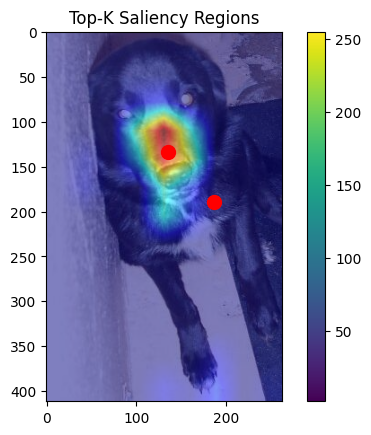

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Load saliency map data
saliency_map = np.load("/Users/luopeiyuan/Desktop/FYP/FYP_Codes/deep-learning-for-image-processing/pytorch_classification/grad_cam/ResNet_IMAGE_Folder/DogSaliencyData/10000.npy")

# Reshape saliency map data to 2D array
saliency_map_2d = saliency_map.reshape(-1, 3)

# Calculate saliency scores for each pixel
saliency_scores = np.sum(saliency_map_2d, axis=1)

# Find indices of top 3 saliency scores
top_k_indices = np.argsort(saliency_scores)[-3:]
print(top_k_indices)

# 计算Top-K区域的坐标
top_k_coordinates = np.unravel_index(top_k_indices, (height, width))  # 修改此处的顺序和大小

# 绘制Saliency Map
plt.imshow(saliency_map)
plt.colorbar()

# 标记Top-K区域
for coordinate in top_k_coordinates:
    plt.plot(coordinate[1], coordinate[0], 'ro', markersize=10)  # 注意坐标顺序

plt.title("Top-K Saliency Regions")
plt.show()

[35383 39462 34126]


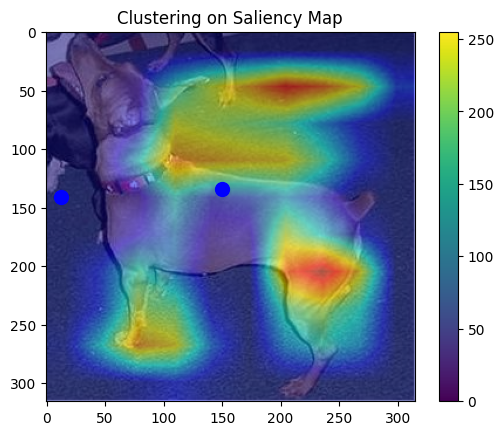

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# 加载Saliency Map数据集
saliency_map = np.load("/Users/luopeiyuan/Desktop/FYP/FYP_Codes/deep-learning-for-image-processing/pytorch_classification/grad_cam/ResNet_IMAGE_Folder/DogSaliencyData/10010.npy")

# Reshape saliency map data to 2D array
saliency_map_2d = saliency_map.reshape(-1, 3)

# Calculate saliency scores for each pixel
saliency_scores = np.sum(saliency_map_2d, axis=1)

# Find indices of top 3 saliency scores
top_k_indices = np.argsort(saliency_scores)[-3:]
print(top_k_indices)

# 计算Top-K区域的坐标
top_k_coordinates = np.unravel_index(top_k_indices, (height, width))  # 修改此处的顺序和大小


# 进行聚类
dbscan = DBSCAN(eps=10, min_samples=2)
clusters = dbscan.fit_predict(np.transpose(top_k_coordinates))

# 绘制Saliency Map
plt.imshow(saliency_map)
plt.colorbar()

# 绘制聚类结果
colors = ['r', 'g', 'b']  # 聚类结果的颜色
for i, coordinate in enumerate(top_k_coordinates):
    cluster_label = clusters[i]
    plt.plot(coordinate[1], coordinate[0], marker='o', color=colors[cluster_label], markersize=10)

plt.title("Clustering on Saliency Map")
plt.show()